In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import os
print(os.path.abspath('.'))

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

from lifelines.utils import concordance_index
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, roc_auc_score, average_precision_score, f1_score

In [3]:
from DeepPurpose import oneliner
from DeepPurpose.dataset import *
from DeepPurpose import utils, models, dataset

In [4]:
model2 = models.model_pretrained(path_dir = './model_MORGAN_CNN_CLA/')
model2

In [5]:
model2.config

{'input_dim_drug': 1024,
 'input_dim_protein': 8420,
 'hidden_dim_drug': 256,
 'hidden_dim_protein': 256,
 'cls_hidden_dims': [1024, 1024, 512],
 'batch_size': 512,
 'train_epoch': 50,
 'test_every_X_epoch': 10,
 'LR': 0.001,
 'drug_encoding': 'Morgan',
 'target_encoding': 'CNN',
 'result_folder': './result/',
 'binary': True,
 'num_workers': 10,
 'cuda_id': None,
 'mlp_hidden_dims_drug': [1024, 256, 64],
 'cnn_target_filters': [32, 64, 96],
 'cnn_target_kernels': [4, 8, 12],
 'decay': 0}

In [6]:
affinity = pd.read_csv('affinity.txt', header=None, sep = '\t')
affinity = affinity.fillna(-1)

with open('target_seq.txt') as f:
    target = json.load(f)

with open('SMILES.txt') as f:
    drug = json.load(f)

target = list(target.values())
drug = list(drug.values())

SMILES = []
Target_seq = []
y = []

for i in range(len(drug)):
    for j in range(len(target)):
        if affinity.values[i, j] != -1:
            SMILES.append(drug[i])
            Target_seq.append(target[j])
            y.append(affinity.values[i, j])

Smile, Target, y = np.array(SMILES), np.array(Target_seq), np.array(y)
print('Done!')

Done!


In [7]:
df_data = pd.DataFrame(zip(Smile, Target, y))
df_data.rename(columns={0:'SMILES',
						1: 'Target_Sequence',
						2: 'Label'}, 
						inplace=True)
print('in total: ' + str(len(df_data)) + ' drug-target pairs')

in total: 118254 drug-target pairs


In [8]:
y_cal = [1 if i else 0 for i in df_data.Label.values > 12.1]

y_cal2 = np.array(y_cal)

In [ ]:
#-----performance of the model on all data(test subset)

In [9]:
# replace y with y_cal2

In [10]:
X_drug = Smile.tolist()
X_target = Target.tolist() 
y = y_cal2.tolist()

drug_encoding, target_encoding = 'Morgan', 'CNN'
X = utils.data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='no_split')

y_pred = model2.predict(X) 
y_label = y

Drug Target Interaction Prediction Mode...
in total: 118254 drug-target pairs
encoding drug...
unique drugs: 2068
encoding protein...
unique target sequence: 229
splitting dataset...
do not do train/test split on the data for already splitted data
predicting...


In [11]:
y_pred_ = pd.DataFrame(y_pred, columns=['y_pred'])
y_pred_.to_csv('y_pred_MORGAN_CNN_CLA.csv')

In [12]:
AUROC = roc_auc_score(y_label, y_pred)
AUPRC = average_precision_score(y_label, y_pred)
#F1 = f1_score(y_label, outputs)

print(AUROC)
print(AUPRC)
#print(F1)

0.9979772718639518
0.9922061655000136


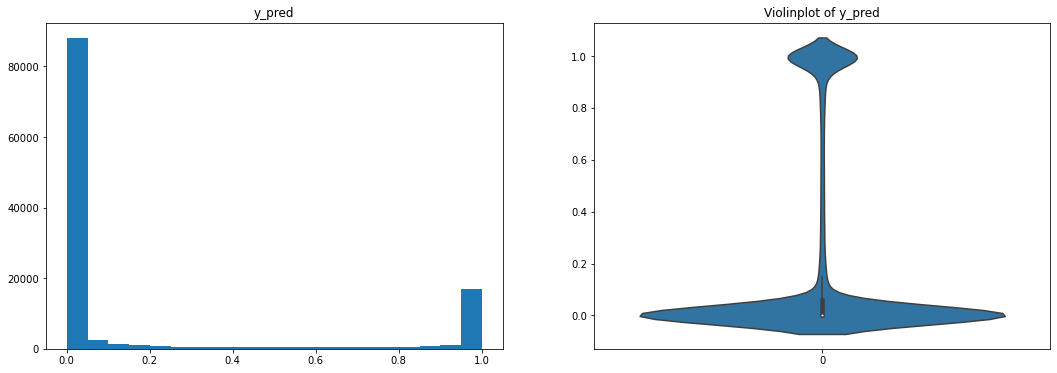

In [13]:
fig, ax = plt.subplots(figsize = (18, 6))
plt.subplot(1, 2, 1);
plt.hist(y_pred, bins=20);
plt.title('y_pred');
plt.subplot(1, 2, 2);
sns.violinplot(data=y_pred);
plt.title('Violinplot of y_pred');

In [14]:
#-----screen potential drugs for Tie2

In [15]:
X_drug = drug
X_target = ['MDSLASLVLCGVSLLLSGTVEGAMDLILINSLPLVSDAETSLTCIASGWRPHEPITIGRDFEALMNQHQDPLEVTQDVTREWAKKVVWKREKASKINGAYFCEGRVRGEAIRIRTMKMRQQASFLPATLTMTVDKGDNVNISFKKVLIKEEDAVIYKNGSFIHSVPRHEVPDILEVHLPHAQPQDAGVYSARYIGGNLFTSAFTRLIVRRCEAQKWGPECNHLCTACMNNGVCHEDTGECICPPGFMGRTCEKACELHTFGRTCKERCSGQEGCKSYVFCLPDPYGCSCATGWKGLQCNEACHPGFYGPDCKLRCSCNNGEMCDRFQGCLCSPGWQGLQCEREGIQRMTPKIVDLPDHIEVNSGKFNPICKASGWPLPTNEEMTLVKPDGTVLHPKDFNHTDHFSVAIFTIHRILPPDSGVWVCSVNTVAGMVEKPFNISVKVLPKPLNAPNVIDTGHNFAVINISSEPYFGDGPIKSKKLLYKPVNHYEAWQHIQVTNEIVTLNYLEPRTEYELCVQLVRRGEGGEGHPGPVRRFTTASIGLPPPRGLNLLPKSQTTLNLTWQPIFPSSEDDFYVEVERRSVQKSDQQNIKVPGNLTSVLLNNLHPREQYVVRARVNTKAQGEWSEDLTAWTLSDILPPQPENIKISNITHSSAVISWTILDGYSISSITIRYKVQGKNEDQHVDVKIKNATITQYQLKGLEPETAYQVDIFAENNIGSSNPAFSHELVTLPESQAPADLGGGKMLLIAILGSAGMTCLTVLLAFLIILQLKRANVQRRMAQAFQNVREEPAVQFNSGTLALNRKVKNNPDPTIYPVLDWNDIKFQDVIGEGNFGQVLKARIKKDGLRMDAAIKRMKEYASKDDHRDFAGELEVLCKLGHHPNIINLLGACEHRGYLYLAIEYAPHGNLLDFLRKSRVLETDPAFAIANSTASTLSSQQLLHFAADVARGMDYLSQKQFIHRDLAARNILVGENYVAKIADFGLSRGQEVYVKKTMGRLPVRWMAIESLNYSVYTTNSDVWSYGVLLWEIVSLGGTPYCGMTCAELYEKLPQGYRLEKPLNCDDEVYDLMRQCWREKPYERPSFAQILVSLNRMLEERKTYVNTTLYEKFTYAGIDCSAEEAA']
y = np.ones(len(drug)).tolist()

drug_encoding, target_encoding = 'Morgan', 'CNN'
X = utils.data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='no_split')

y_pred = model2.predict(X) 
y_label = y

Drug Target Interaction Prediction Mode...
in total: 2111 drug-target pairs
encoding drug...
unique drugs: 2068
encoding protein...
unique target sequence: 1
splitting dataset...
do not do train/test split on the data for already splitted data
predicting...


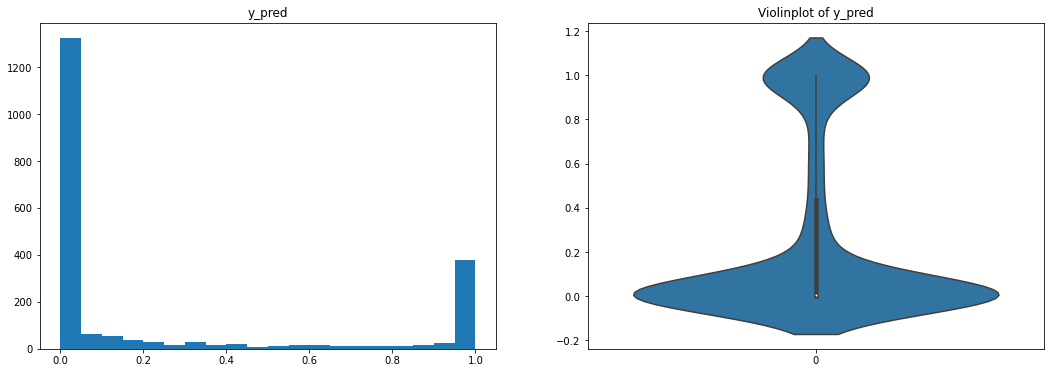

In [16]:
fig, ax = plt.subplots(figsize = (18, 6))
plt.subplot(1, 2, 1);
plt.hist(y_pred, bins=20);
plt.title('y_pred');
plt.subplot(1, 2, 2);
sns.violinplot(data=y_pred);
plt.title('Violinplot of y_pred');

In [17]:
a=pd.DataFrame(drug,columns=['drug'])
a

,drug
0,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl
1,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=CC=C3)Cl)Cl
2,C1COCCN1C2=CC(=CC=C2)NC3=NC=CC(=N3)C4=C(N=C5N4...
3,C1=CC2=C(C=C1C3=NC(=NC=C3)N)NN=C2N
4,CNC1=NC(=CN=C1)C2=CNC(=O)C(=C2)NC(=O)C3=CC=C(C...
...,...
2106,CC1CC=CC(=O)CCCC=CC2=CC(=CC(=C2C(=O)O1)O)OC
2107,CC1CC=CC(=O)CCCCCC2=CC(=CC(=C2C(=O)O1)O)OC
2108,CCN1C2=C(C=CC(=C2)OC)SC1=CC(=O)C
2109,CN1C=CC2=C1C3=C(C=C2)C4=C(C5=C(N4)C(=CC=C5)CCC...


In [18]:
b=pd.DataFrame(y_pred,columns=['y_pred'])
b

,y_pred
0,2.702786e-09
1,1.778682e-07
2,1.000000e+00
3,6.028279e-02
4,7.009972e-02
...,...
2106,1.921003e-05
2107,5.716927e-05
2108,9.996147e-01
2109,2.736675e-01


In [19]:
c=pd.concat([a,b],axis=1)
c

,drug,y_pred
0,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl,2.702786e-09
1,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=CC=C3)Cl)Cl,1.778682e-07
2,C1COCCN1C2=CC(=CC=C2)NC3=NC=CC(=N3)C4=C(N=C5N4...,1.000000e+00
3,C1=CC2=C(C=C1C3=NC(=NC=C3)N)NN=C2N,6.028279e-02
4,CNC1=NC(=CN=C1)C2=CNC(=O)C(=C2)NC(=O)C3=CC=C(C...,7.009972e-02
...,...,...
2106,CC1CC=CC(=O)CCCC=CC2=CC(=CC(=C2C(=O)O1)O)OC,1.921003e-05
2107,CC1CC=CC(=O)CCCCCC2=CC(=CC(=C2C(=O)O1)O)OC,5.716927e-05
2108,CCN1C2=C(C=CC(=C2)OC)SC1=CC(=O)C,9.996147e-01
2109,CN1C=CC2=C1C3=C(C=C2)C4=C(C5=C(N4)C(=CC=C5)CCC...,2.736675e-01


In [20]:
c.to_csv('y_pred_TIE2_MORGAN_CNN_CLA.csv')

In [21]:
d=c.sort_values(axis=0, ascending=False, by='y_pred')
d

,drug,y_pred
686,C1CC(C1)N2C3=C(C(=N2)C4=CC(=C(C=C4)Cl)O)C(=NC=...,1.000000e+00
790,CC1CCC(C1)N2C3=C(C(=N2)C4=CC(=C(C=C4)F)O)C(=NC...,1.000000e+00
667,CC1=C(C=C(C=C1)C2=NN(C3=C2C(=NC=N3)N)C)O,1.000000e+00
785,C1CCC(C1)N2C3=C(C(=N2)C4=CC(=C(C=C4)F)O)C(=NC=...,1.000000e+00
787,C1CCC(C1)N2C3=C(C(=N2)C4=CC5=C(C=C4)C=NN5)C(=N...,1.000000e+00
...,...,...
1235,C1=C(C=NC2=NNC(=C21)N)Br,9.670122e-19
1118,CC(C)(C)C1=NN(C(=C1)NC(=O)C(=O)C2=CC=CC3=CC=CC...,6.103873e-19
1544,C1CC2=C(CC1C3=CC=CC=C3)C=NN2,1.538980e-19
1452,C1=CC(=CC=C1S(=O)(=O)CC(=O)NN=CC2=C(C(=C(C(=C2...,5.653621e-22


In [22]:
d.to_csv('y_pred_TIE2_MORGAN_CNN_CLA_SORTED.csv')